

## Introduction to Predictive Maintenance

Predictive Maintenance (PdM) embodies a progressive approach to industrial upkeep, proactively anticipating equipment malfunctions before they transpire. As highlighted in a [RealPars article](https://www.realpars.com/blog/predictive-maintenance), PdM employs sophisticated data analysis and machine learning techniques to detect incipient issues, thus curtailing operational downtime and maintenance expenditures.

![Device Health Over Time](https://assets-global.website-files.com/64ed06228d24e5d52132b49f/64f09fe98af9f6e69c50d479_Predictive-maintenance.gif)
*The trajectory of device health leading to a point of failure.*

PdM not only promises enhanced operational efficiency but also ensures safety by maintaining system integrity. The methodology leverages both historical and real-time data, forging a path toward informed and intelligent maintenance decisions.

![Utilizing AI for Predictive Maintenance](https://assets-global.website-files.com/64ed06228d24e5d52132b49f/64f09fe991a5b2230a41d93d_Utilizing-Artificial-Intelligence-for-Predictive-maintenance.webp)
*Artificial Intelligence analyzes data to guide predictive maintenance.*

The strategic implementation of predictive maintenance stands to revolutionize various industries, especially those reliant on high-stakes and high-availability equipment. By shifting from reactive to predictive strategies, organizations can achieve a significant reduction in unplanned downtime, ensuring continuous and reliable service delivery.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from datetime import datetime
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler, StandardScaler



## Dataset Acquisition and Overview

To begin our predictive maintenance journey, we first need access to quality data. For our analysis, we will be using a specialized dataset hosted on Zenodo, an open-access repository where researchers can share and preserve research outputs, including datasets.

The dataset we're interested in is meticulously curated to provide a wealth of information necessary for predictive maintenance modeling. It includes various sensor readings that are critical for understanding the operational health of industrial equipment.

### Downloading the Dataset

To download the dataset, we'll use the `wget` command in our notebook environment. This command-line utility allows us to retrieve files using HTTP, HTTPS, and FTP, which are the most widely-used Internet protocols. The following command initiates the download process, ensuring that we have the most current version of the dataset for our work:


.

In [2]:
!wget https://zenodo.org/records/6854240/files/dataset_train.csv?download=1 -O dataset_train.csv


--2024-01-07 18:25:02--  https://zenodo.org/records/6854240/files/dataset_train.csv?download=1
Resolving zenodo.org (zenodo.org)... 188.184.103.159, 188.184.98.238, 188.185.79.172, ...
Connecting to zenodo.org (zenodo.org)|188.184.103.159|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1646201046 (1.5G) [text/plain]
Saving to: ‘dataset_train.csv’

dataset_train.csv   100%[===================>]   1.53G  26.2MB/s    in 63s     

2024-01-07 18:26:07 (24.7 MB/s) - ‘dataset_train.csv’ saved [1646201046/1646201046]



# Loading and Displaying the Top Rows of a DataFrame

First, we import the `pandas` library, which is essential for data manipulation and analysis in Python. We use the alias `pd` for convenience.




In [3]:
df = pd.read_csv('dataset_train.csv')
df.head()

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Flowmeter,Motor_current,COMP,...,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,gpsLong,gpsLat,gpsSpeed,gpsQuality
0,2022-01-01 06:00:00,-0.012,9.758,9.760,-0.028,1.576,63.350,19.049625,3.9550,1,...,1,1,0,0,0,0,-8.65934,41.2124,0,1
1,2022-01-01 06:00:01,-0.012,9.760,9.760,-0.028,1.578,63.250,19.049625,4.0275,1,...,1,1,0,0,0,0,-8.65934,41.2124,0,1
2,2022-01-01 06:00:02,-0.010,9.760,9.760,-0.028,1.578,63.325,19.040281,3.9450,1,...,1,1,0,0,0,0,-8.65934,41.2124,0,1
3,2022-01-01 06:00:03,-0.012,9.756,9.756,-0.030,1.576,63.200,19.040281,3.9300,1,...,1,1,0,0,0,0,-8.65934,41.2124,0,1
4,2022-01-01 06:00:04,-0.012,9.756,9.756,-0.030,1.578,63.150,19.049625,3.9950,1,...,1,1,0,0,0,0,-8.65934,41.2124,0,1


In [4]:
df.columns

Index(['timestamp', 'TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs',
       'Oil_temperature', 'Flowmeter', 'Motor_current', 'COMP', 'DV_eletric',
       'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level',
       'Caudal_impulses', 'gpsLong', 'gpsLat', 'gpsSpeed', 'gpsQuality'],
      dtype='object')



## Dataset Description: MetroPT Dataset

The MetroPT dataset is a comprehensive collection of data harvested from the Porto metro system, designed to support the advancement of Predictive Maintenance (PdM) strategies through machine learning. The dataset is rich with sensor readings that provide insights into the day-to-day operations and the health of the metro system's critical components.

### Detailed Composition

The dataset comprises two main types of sensor data:

#### Analog Sensors:
These sensors provide continuous data that measure various physical properties:

- **Temperature Sensors (e.g., TP3)**: Record the thermal state of components, crucial for detecting overheating issues.
- **Pressure Sensors (e.g., DV_pressure)**: Monitor the pressure levels within hydraulic systems to ensure they operate within safe limits.
- **Flow Meters**: Measure the rate of flow of fluids, indicating the performance efficiency of fluid systems.
- **Current Meters (e.g., Motor_current)**: Assess the electrical currents, which can reveal electrical issues or motor faults.

The analog signals are vital for identifying trends and patterns that may signify wear or potential failures.

#### Digital Sensors:
These sensors record binary (on/off) states and events:

- **Switches (e.g., Pressure_switch)**: Detect if a circuit is closed or open, indicating operational states or abrupt changes in system behavior.
- **Level Sensors (e.g., Oil_level)**: Ensure that fluid levels are maintained, signaling the need for refills or potential leaks.
- **Temperature Control (e.g., COMP)**: Regulate and maintain optimal temperature conditions within specific thresholds.
- **Operational States (e.g., Towers, LPS)**: Reflect the activation or deactivation of systems and sub-systems within the metro train.

The digital signals are essential for monitoring the discrete states of components and can be directly correlated with operational events or alerts.

### Significance of Sensor Data

The analog and digital sensor data, when analyzed collectively, offer a multidimensional view of the metro system's operational health. The analog data, with its nuanced variations, is suitable for detecting gradual trends or sudden departures from typical patterns. In contrast, the digital data provides clear-cut information on system states and transitions, which are also indicative of performance and potential issues.

Together, these sensors form the backbone of a sophisticated Predictive Maintenance system, which aims to minimize unexpected downtime and extend the lifespan of the metro system's components through timely and informed maintenance interventions.

### Objectives for Analysis

With the MetroPT dataset at our disposal, we are equipped to tackle several objectives:

- **Early Failure Detection**: Leveraging the detailed sensor data to predict equipment failures before they occur.
- **Maintenance Optimization**: Using predictive insights to schedule maintenance activities efficiently, avoiding both premature and overdue interventions.
- **Operational Excellence**: Continuously monitoring the health of the metro system to achieve high reliability and safety standards for commuters.

As we delve into the dataset, we'll explore the specific roles these sensors play in maintaining the integrity of the metro system and how their data can be used to predict and prevent component failures.



# Dropping Unnecessary Columns from DataFrame

This code snippet is focused on cleaning up the DataFrame by removing columns that are not required for the analysis. Specifically, it drops the columns 'gpsLong', 'gpsLat', 'gpsSpeed', and 'gpsQuality'. This is achieved using the `drop` method in pandas, specifying `axis=1` to indicate column removal. The `inplace=True` parameter is used to make the changes directly in the original DataFrame without the need for reassignment.



In [5]:
df.drop(['gpsLong', 'gpsLat', 'gpsSpeed', 'gpsQuality'], axis=1, inplace=True)


# Dataset Overview and Data Quality Check

This code snippet is designed to provide a quick overview of a DataFrame and assess its data quality. It begins by printing the shape of the dataset, giving an insight into the number of rows and columns.

The next step involves checking for missing values across all columns. The script calculates the total number of missing values in each column and prints this information, offering a clear view of data completeness.

Finally, the data types of each column are determined and printed. This is essential for understanding the kind of data each column holds, which is crucial for subsequent data processing and analysis.




In [6]:
# Print shape of the dataset
print('Shape of the dataset is: ', df.shape)

# Check for missing values in the DataFrame
missing_values = df.isnull().sum()

# Print the number of missing values in each column
print("Number of missing values in each column:")
print(missing_values)

# Get the data types of the columns
column_types = df.dtypes

# Print the data types of each column
print("\nData types of each column:")
print(column_types)

Shape of the dataset is:  (10773588, 17)
Number of missing values in each column:
timestamp          0
TP2                0
TP3                0
H1                 0
DV_pressure        0
Reservoirs         0
Oil_temperature    0
Flowmeter          0
Motor_current      0
COMP               0
DV_eletric         0
Towers             0
MPG                0
LPS                0
Pressure_switch    0
Oil_level          0
Caudal_impulses    0
dtype: int64

Data types of each column:
timestamp           object
TP2                float64
TP3                float64
H1                 float64
DV_pressure        float64
Reservoirs         float64
Oil_temperature    float64
Flowmeter          float64
Motor_current      float64
COMP                 int64
DV_eletric           int64
Towers               int64
MPG                  int64
LPS                  int64
Pressure_switch      int64
Oil_level            int64
Caudal_impulses      int64
dtype: object


# Optimizing DataFrame Memory Usage

This code snippet is designed to optimize the memory usage of a pandas DataFrame. It starts by calculating the initial memory usage of the DataFrame `df`. Then, it reduces memory usage by downcasting integer columns to the smallest possible integer type and converting float columns to `float32`. Finally, it calculates and displays the final memory usage and the amount of memory saved through this optimization process.




In [7]:
# Calculate the initial memory usage
initial_memory = df.memory_usage(deep=True).sum()
print(f'Initial memory usage: {initial_memory // 1e6} Mb')

# Convert integer columns to the smallest possible int type
for col in df.select_dtypes(include='int64').columns:
    df[col] = pd.to_numeric(df[col], downcast='integer')

# Convert float columns to float32
for col in df.select_dtypes(include='float64').columns:
    df[col] = df[col].astype('float32')

# Calculate the final memory usage after type conversion
final_memory = df.memory_usage(deep=True).sum()
print(f'Final memory usage: {final_memory // 1e6} Mb')

# Calculate and print the difference in memory usage
memory_difference = initial_memory - final_memory
print(f'Memory saved: {memory_difference // 1e3} byte')

Initial memory usage: 2197.0 Mb
Final memory usage: 1249.0 Mb
Memory saved: 948075.0 byte


# Enhancing DataFrame with Conditional Data

This code snippet demonstrates how to enhance a pandas DataFrame with additional information based on specific conditions. Initially, a 'timestamp' column is converted to a datetime format for accurate time-based operations. Then, two new columns - 'Failure Type' and 'Failure Component' - are added with default values 'No Failure' and 'No Failure Component', respectively.

The core of this snippet involves defining a series of conditions along with corresponding values for 'Failure Type' and 'Failure Component'. These conditions are based on specific time ranges. The script iterates through these conditions and updates the DataFrame where the conditions are met, providing a detailed and dynamic categorization of failure types and components based on the 'timestamp'.


## Recorded Failures Overview

Here is a summary of the failure events captured in the dataset:

| Nr.        | Type       | Component  | Start           | End             | # Exs.   |
|------------|------------|------------|-----------------|-----------------|----------|
| Failure 1  | Air Leak   | Clients    | 28-02-22 21:53  | 01-03-22 02:00  | 14       |
| Failure 2  | Air Leak   | Air Dryer  | 23-03-22 14:54  | 23-03-22 15:24  | 820      |
| Failure 3  | Oil Leak   | Compressor | 30-05-22 12:00  | 02-06-22 06:18  | 281,800  |


In [8]:


# Add 'Failure Type' and 'Failure Component' columns with default values
df['Failure Type'] = 'No Failure'
df['Failure Component'] = 'No Failur Component'

# Define conditions and corresponding values
conditions_values = [
    ((df['timestamp'] >= '2022-02-28 21:53:00') &
     (df['timestamp'] < '2022-03-01 02:00:00'), 'Air Leak', 'Clients'),

    ((df['timestamp'] >= '2022-03-23 14:54:00') &
     (df['timestamp'] < '2022-03-23 15:24:00'), 'Air Leak', 'Air Dryer'),

    ((df['timestamp'] >= '2022-05-30 12:00:00') &
     (df['timestamp'] < '2022-06-02 06:18:00'), 'Oil Leak', 'Compressor')
]

# Loop through conditions and update values
for condition, failure_type, failure_component in conditions_values:
    df.loc[condition, 'Failure Type'] = failure_type
    df.loc[condition, 'Failure Component'] = failure_component


# Analyzing Failure Types and Components in a DataFrame

This code snippet is focused on analyzing the distribution of failure types and components within a DataFrame. It begins by calculating the count of each category in the 'Failure Type' and 'Failure Component' columns using the `value_counts()` method.

The script then computes the percentage representation of each failure type and component relative to the total number of samples in the DataFrame. This is achieved by dividing the counts by the total number of samples and multiplying by 100.

Finally, the results, both counts and percentages, are displayed. This provides a clear understanding of how different failure types and components are distributed across the entire dataset, which is essential for identifying prevalent issues or areas requiring attention.




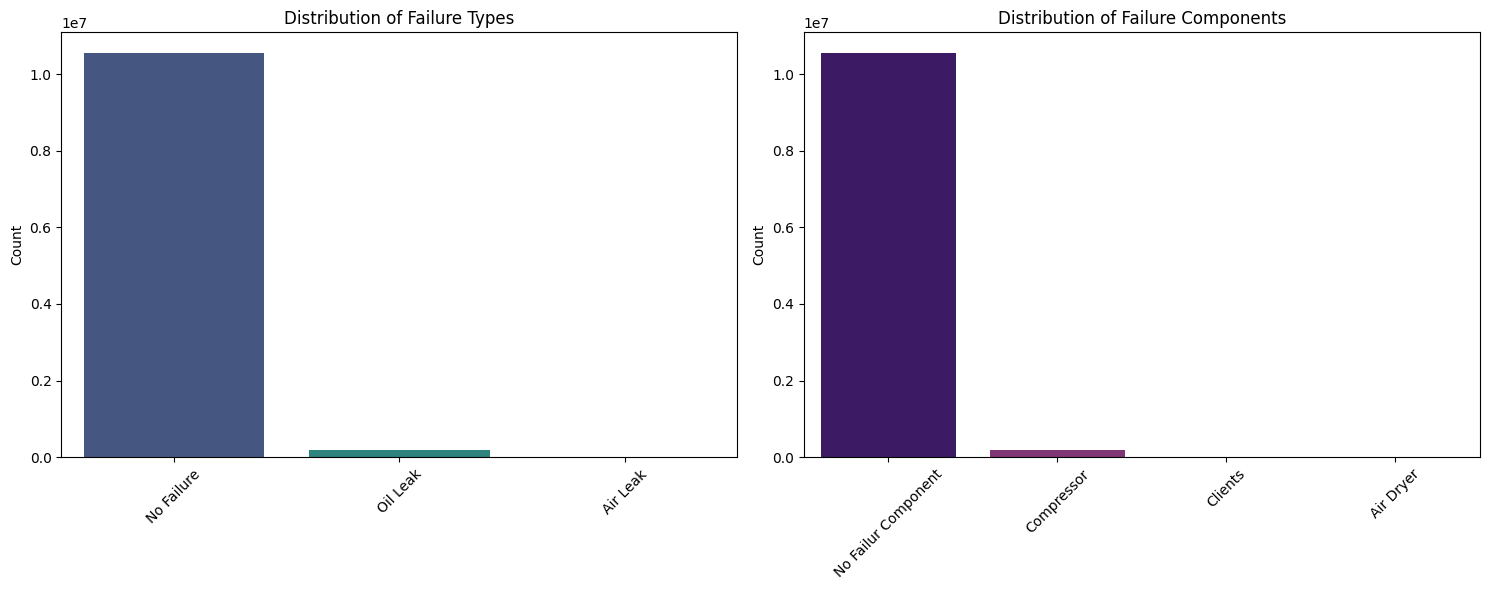

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your pandas DataFrame with 'Failure Type' and 'Failure Component' as columns

# Calculate the counts
failure_type_counts = df['Failure Type'].value_counts()
failure_component_counts = df['Failure Component'].value_counts()

# Create subplots for bar charts
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Bar chart for Failure Type
sns.barplot(x=failure_type_counts.index, y=failure_type_counts.values, ax=axs[0], palette="viridis")
axs[0].set_title('Distribution of Failure Types')
axs[0].set_ylabel('Count')
axs[0].tick_params(axis='x', rotation=45)

# Bar chart for Failure Component
sns.barplot(x=failure_component_counts.index, y=failure_component_counts.values, ax=axs[1], palette="magma")
axs[1].set_title('Distribution of Failure Components')
axs[1].set_ylabel('Count')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## Analog Sensor Data Visualization

The plot below showcases a time-series visualization of various sensor readings from the Air Production Unit (APU) of a metro train over a specific time period on January 1, 2022. Each subplot corresponds to a different sensor, providing a detailed look at the data's behavior throughout this time frame.

- **Blue Line (TP2)**: Shows the temperature readings from sensor TP2.
- **Red Line (TP3)**: Represents the temperature readings from sensor TP3.
- **Cyan Line (H1)**: Indicates pressure measurements from sensor H1.
- **Purple Line (DV_pressure)**: Reflects the pressure values from the discharge valve.
- **Yellow Line (Reservoirs)**: Captures data from the reservoir's pressure sensors.
- **Orange Line (Oil_temperature)**: Displays the temperature of the oil in the system.
- **Pink Line (Flowmeter)**: Measures the rate of flow within the system.
- **Green Line (Motor_current)**: Shows the electric current measurements from the motor.

These visualizations are crucial for detecting patterns that may indicate normal operation or potential anomalies that could lead to failures.



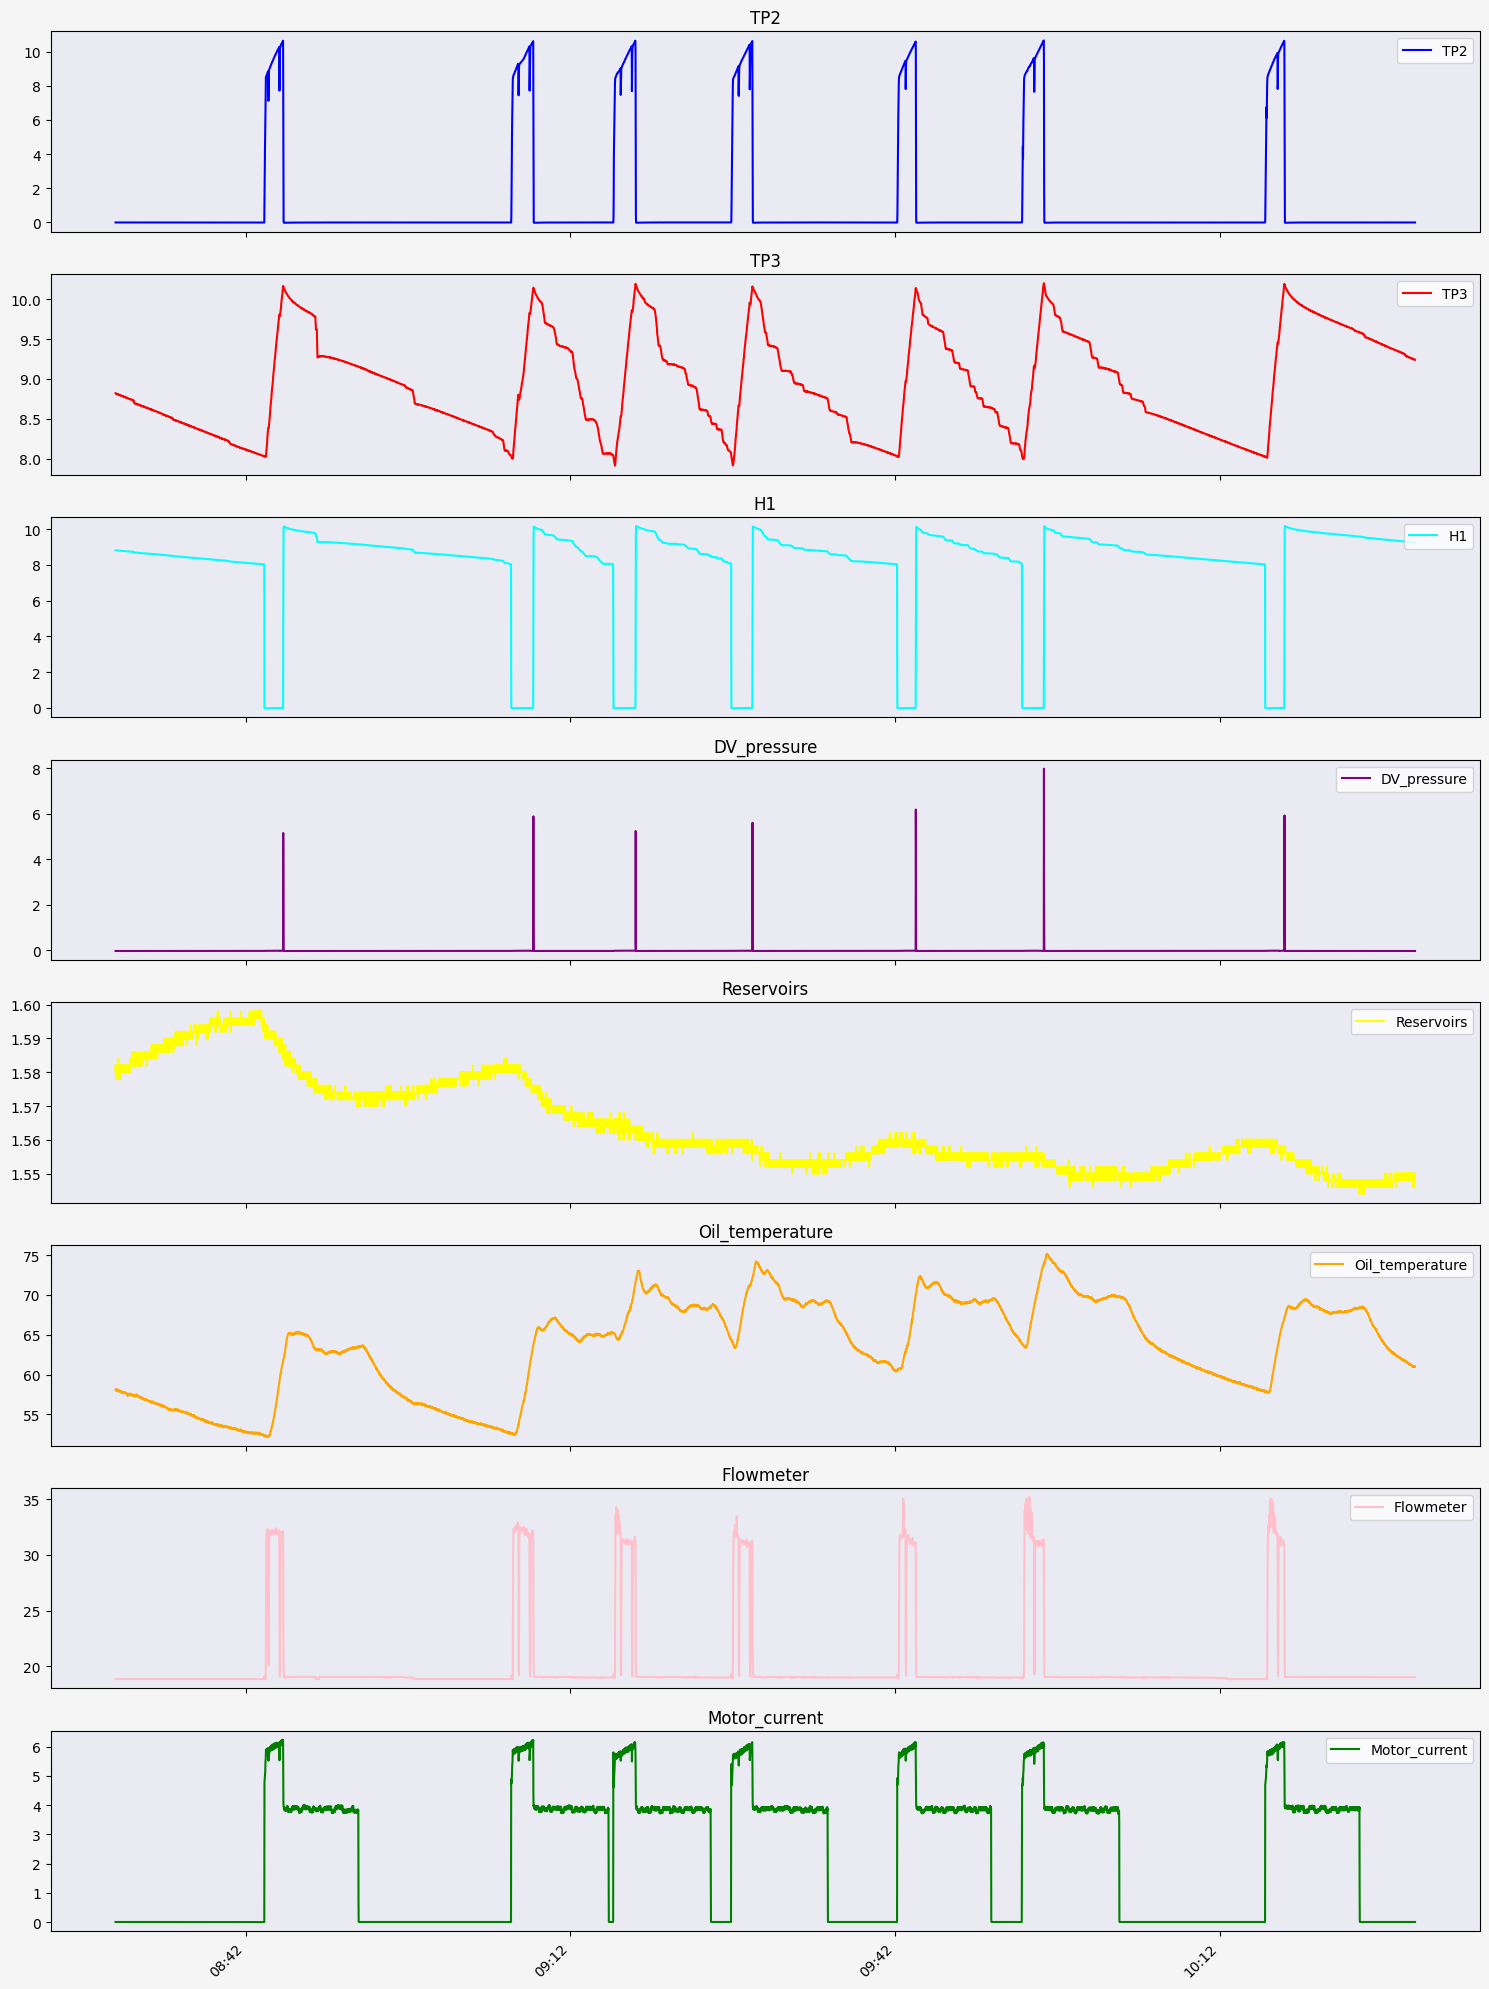

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

# Assume df is preloaded with the relevant data and 'timestamp' as the index in datetime format
# Ensure that 'timestamp' is a datetime type and set as the index
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

# Define the time range for the x-axis based on your data
start_time = "2022-01-01 08:30:00"
end_time = "2022-01-01 10:30:00"

# Convert the time range to datetime format
start_time = pd.to_datetime(start_time)
end_time = pd.to_datetime(end_time)

# Filter the dataframe to only include the specified time range
df_time_filtered = df.loc[(df.index >= start_time) & (df.index <= end_time)]

# Define the list of sensor columns to plot (excluding non-sensor columns like 'Failure Type' and 'Failure Component')
sensor_columns = ['TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs',
                  'Oil_temperature', 'Flowmeter', 'Motor_current']
# Define colors for the plot
colors = ['blue', 'red', 'cyan', 'purple', 'yellow', 'orange', 'pink', 'green']

# Create subplots
fig, axes = plt.subplots(nrows=len(sensor_columns), ncols=1, figsize=(15, 20), sharex=True)

# Set the background color for the entire figure
fig.patch.set_facecolor('#f5f5f5')  # Example: light grey background for the figure

# Plot each sensor data
for ax, sensor, color in zip(axes, sensor_columns, colors):
    ax.set_facecolor('#eaeaf2')  # Example: lighter grey background for each subplot
    ax.plot(df_time_filtered.index, df_time_filtered[sensor], label=sensor, color=color)
    ax.set_title(sensor)
    ax.legend(loc='upper right')

# Set the date format on the x-axis
axes[-1].xaxis.set_major_locator(mdates.MinuteLocator(interval=30))  # Set major ticks to every 30 minutes
axes[-1].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Show only hours and minutes

# Rotate date labels for better readability
plt.setp(axes[-1].get_xticklabels(), rotation=45, ha='right')

# Adjust layout
plt.tight_layout()


# Show the plot
plt.show()




## Imminent Failure Labeling in Time Series Data

This section of the code is designed to identify and label imminent failures in the dataset, which is a crucial step in preparing the data for predictive maintenance modeling. The goal is to mark a time window leading up to each failure event, allowing the model to recognize patterns that signify an impending failure.

### Extracting Failure Start Times


First, we identify the start times of all failures by filtering the DataFrame `df` for rows where the 'Failure Type' is not 'No Failure'. We then extract the unique timestamps of these failure events. These timestamps mark the actual beginning of failure incidents.

### Defining the Imminent Failure Window



A time window of 2 hours (`time_window`) is set, representing the critical period before each failure where signs of an impending failure might be observed. This period is crucial for predictive maintenance, as it provides a lead time for taking preventive action.

### Labeling Imminent Failures


We then initialize a new column `imminent_failure` in the DataFrame to hold binary labels (0 or 1). For each failure start time, we calculate the beginning of the imminent failure window (2 hours before the actual failure) and label all data points within this window as `1` (indicating imminent failure). Data points outside this window are labeled as `0`, suggesting normal operation without an impending failure.

### Result

As a result, this labeling process equips the dataset with a crucial feature for predictive modeling – the ability to identify when a system is approaching a failure state. This feature is pivotal for training machine learning models that aim to predict failures before they occur, thereby enabling timely maintenance actions and reducing downtime.



In [11]:

# Assuming 'df' is your DataFrame with DatetimeIndex
# Extract start times of failures
failure_start_times = df[df['Failure Type'] != 'No Failure'].index.unique()

# Define the time window (2 hours)
time_window = pd.Timedelta(hours=2)

# Initialize a new column for the binary label
df['imminent_failure'] = 0

# Iterate through the unique failure start times
for start_time in failure_start_times:
    # Calculate the start of the imminent failure window
    window_start = start_time - time_window

    # Update the imminent_failure column within this window
    df.loc[window_start:start_time, 'imminent_failure'] = 1


In this visualization, we examine the distribution of imminent failures using a count plot. It highlights the balance between normal operation instances and those flagged for imminent failure, offering crucial insights into dataset imbalance, critical for effective predictive maintenance modeling.

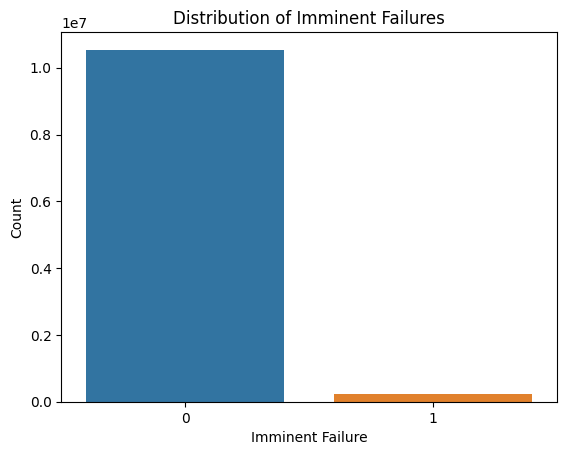

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count plot for imminent failures
sns.countplot(x=df['imminent_failure'])
plt.title('Distribution of Imminent Failures')
plt.xlabel('Imminent Failure')
plt.ylabel('Count')
plt.show()


This histogram displays the frequency of imminent failures over time, broken down by day. By aggregating instances marked as imminent failures, the plot reveals temporal trends and patterns, aiding in understanding when failures are more likely to occur, thus informing proactive maintenance strategies.

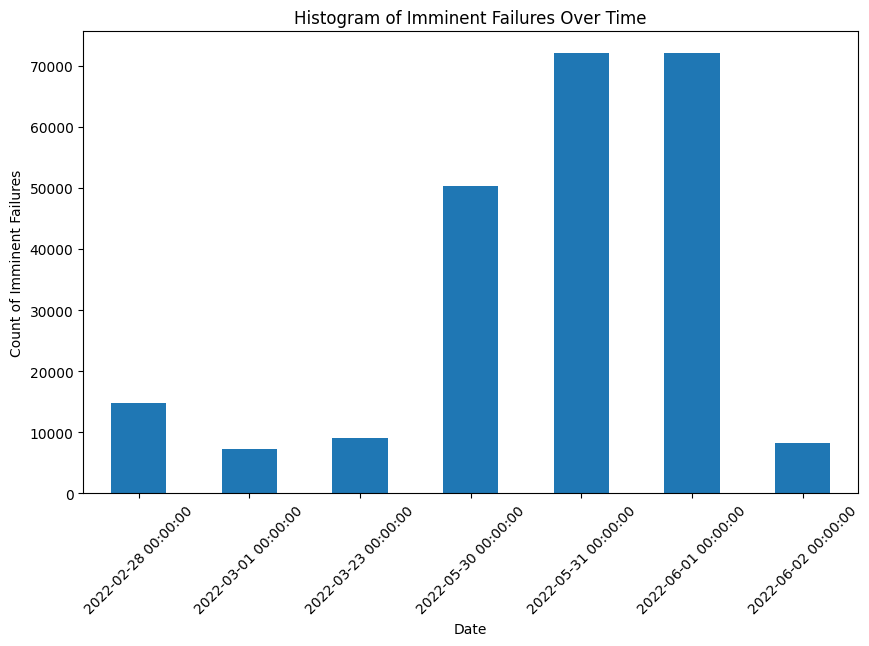

In [13]:
# Creating a histogram of imminent failures over time
plt.figure(figsize=(10, 6))
df[df['imminent_failure'] == 1].index.to_series().dt.floor('d').value_counts().sort_index().plot(kind='bar')
plt.title('Histogram of Imminent Failures Over Time')
plt.xlabel('Date')
plt.ylabel('Count of Imminent Failures')
plt.xticks(rotation=45)
plt.show()


---

## Analyzing Motor Current Trends Around Failure Windows

This analysis delves into the patterns of motor current in proximity to failure events within the dataset. By meticulously examining specific time windows around these failures, we gain insights into how the motor current behaves before, during, and after a failure.

The process begins by defining a series of failure windows, each marked by a start and end time based on recorded failure incidents. These windows are then expanded to include a buffer period, in this case, 180 minutes before and after the actual failure times. This buffer allows for a broader view of the data, capturing potential early signs of failure and the aftermath.

For each of these windows, a focused plot is generated showing the motor current over time. Points of imminent failure are distinctly marked, enabling a visual correlation between the current trends and the failure instances. Additionally, the actual failure period is highlighted, offering a clear demarcation of when the system was in a state of failure.

This visualization is not just a tool for retrospective analysis but also serves as a blueprint for predictive maintenance strategies. By understanding the typical current signatures leading up to failures, maintenance teams can be better equipped to anticipate and mitigate future incidents, thereby enhancing operational efficiency and reducing downtime.



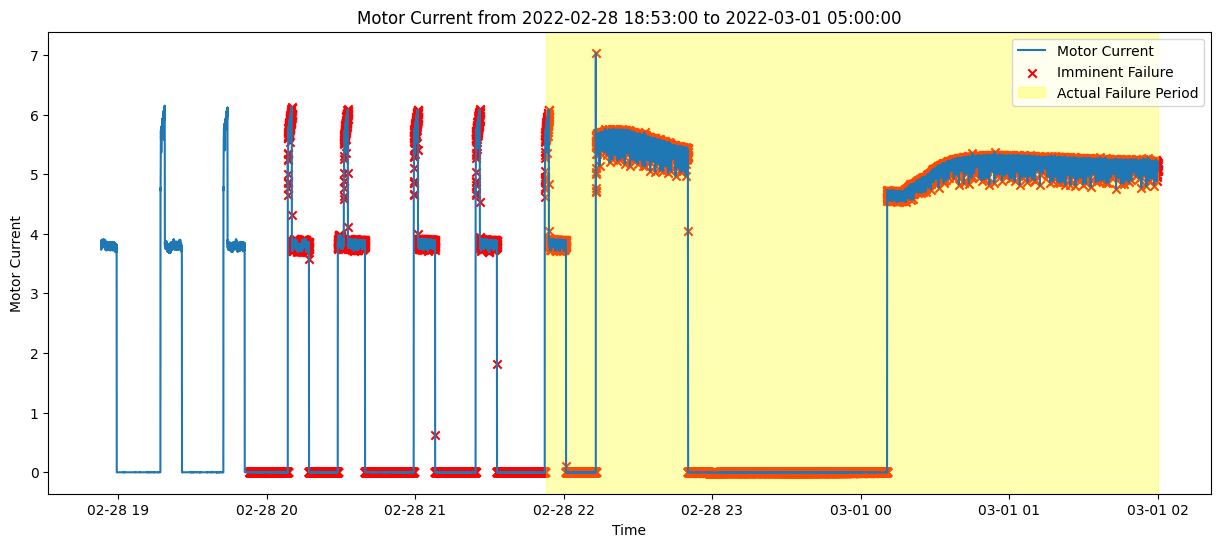

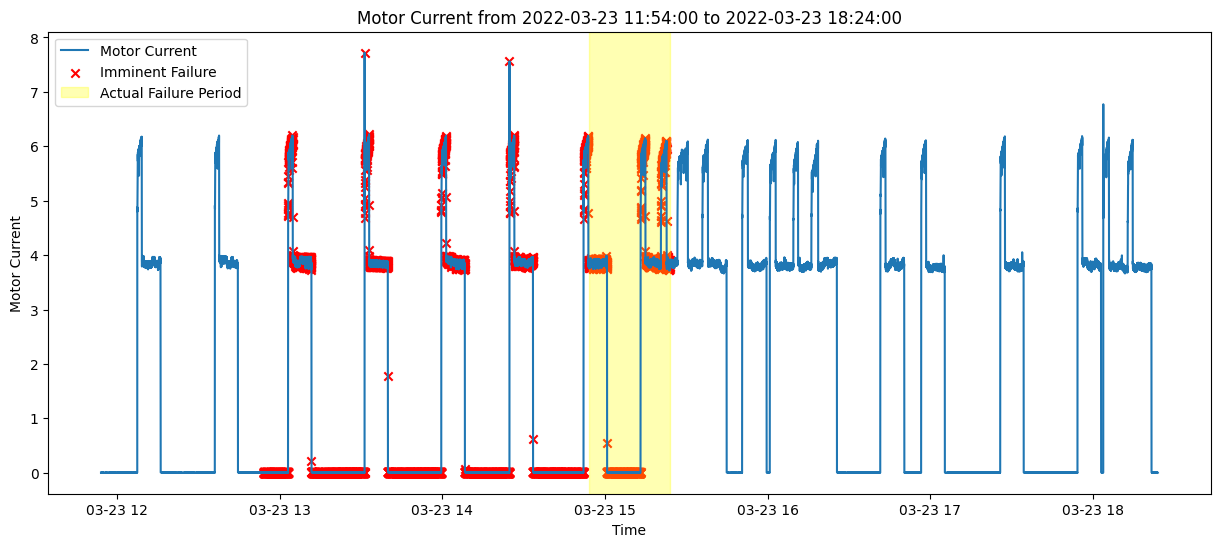

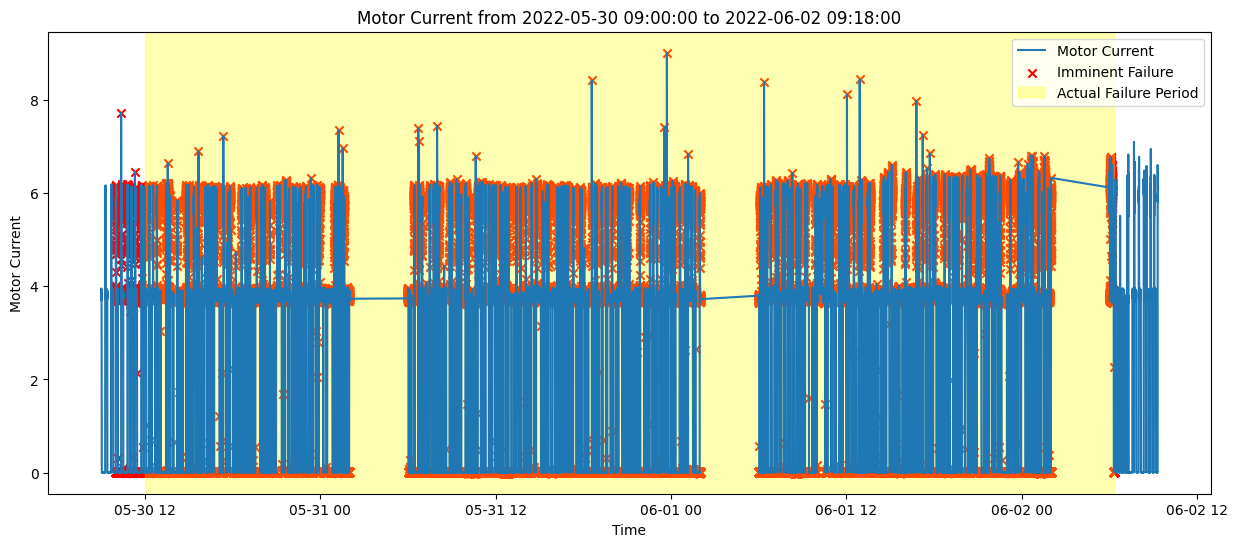

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# List of failure windows with some buffer time added
failure_windows = [
    ('2022-02-28 21:53:00', '2022-03-01 02:00:00'),
    ('2022-03-23 14:54:00', '2022-03-23 15:24:00'),
    ('2022-05-30 12:00:00', '2022-06-02 06:18:00')
]

# Convert strings to datetime
failure_windows = [(pd.to_datetime(start), pd.to_datetime(end)) for start, end in failure_windows]

# Add buffer time (e.g., 30 minutes before and after)
buffer = pd.Timedelta(minutes=180)
failure_windows = [(start - buffer, end + buffer) for start, end in failure_windows]

# Function to plot each failure window
def plot_failure_window(df, start, end):
    window_df = df[(df.index >= start) & (df.index <= end)]

    plt.figure(figsize=(15, 6))
    plt.plot(window_df.index, window_df['Motor_current'], label='Motor Current')  # Replace 'Motor_current' with your sensor column
    plt.scatter(window_df[window_df['imminent_failure'] == 1].index, window_df[window_df['imminent_failure'] == 1]['Motor_current'], color='red', label='Imminent Failure', marker='x')
    plt.axvspan(start + buffer, end - buffer, color='yellow', alpha=0.3, label='Actual Failure Period')

    plt.title(f'Motor Current from {start} to {end}')
    plt.xlabel('Time')
    plt.ylabel('Motor Current')
    plt.legend()
    plt.show()

# Plot each failure window
for start, end in failure_windows:
    plot_failure_window(df, start, end)


In [15]:
df.columns

Index(['TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs', 'Oil_temperature',
       'Flowmeter', 'Motor_current', 'COMP', 'DV_eletric', 'Towers', 'MPG',
       'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses',
       'Failure Type', 'Failure Component', 'imminent_failure'],
      dtype='object')

## Modeling

### XGBoost Model Training with GPU Support

We have updated our model training process to leverage GPU acceleration provided by XGBoost. This allows for faster computation, which is particularly beneficial when dealing with large datasets or when tuning hyperparameters.

The main changes in the code are:
- Set `tree_method` to `'hist'`, which is compatible with the GPU.
- Added `device='gpu'` to direct XGBoost to use the GPU for training.
- Included `eval_metric='logloss'` to provide a suitable evaluation metric for binary classification.
- Set `use_label_encoder=False` to avoid label encoding, as we are providing labels in binary format.

#### Custom Cross-Validation
We perform custom cross-validation to ensure that each fold of our model training includes both normal operation data and failure events. This approach simulates real-world conditions where the model needs to predict future failures based on historical data.

#### Metrics Calculation
After each fold, we calculate the True Positives (TP), False Positives (FP), and False Negatives (FN) to evaluate our model's performance. These metrics are crucial for understanding how well the model can detect imminent failures, which is essential for scheduling maintenance in a timely manner.

#### Additional Notes:
- Ensure that your environment is set up with the necessary GPU drivers and libraries, such as CUDA, to utilize XGBoost's GPU capabilities.
- The code assumes that the data is preprocessed and that the DataFrame `df` is sorted chronologically by the timestamp index.
- The time blocks for cross-validation should be chosen to ensure that the model is validated against a representative mix of normal operation and failure conditions.


In [17]:
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from xgboost import DMatrix

# Assuming df is your DataFrame and it's sorted by timestamp (df.index)
# Define the failure event timestamps
failure_timestamps = df[df['Failure Type'] != 'No Failure'].index.unique()

# Define time blocks for cross-validation
time_blocks = pd.to_datetime(['2022-01-01', '2022-02-28 21:53:00', '2022-03-23 14:54:00', '2022-05-30 12:00:00', '2022-06-03'])
blocks = [(time_blocks[i], time_blocks[i+1]) for i in range(len(time_blocks)-1)]

# Function to calculate TP, FP, FN
def calculate_overlap_metrics(y_true, y_pred):
    TP = FP = FN = 0
    for i in range(len(y_pred)):
        if y_pred[i] == 1:
            if y_true[i] == 1:
                TP += 1
            else:
                FP += 1
        elif y_pred[i] == 0 and y_true[i] == 1:
            FN += 1
    return TP, FP, FN

# Custom cross-validation
kf = KFold(n_splits=3)  # 3-fold cross-validation

# Initialize metrics
metrics = {
    'TP': 0,
    'FP': 0,
    'FN': 0
}

# Cross-validation loop
for train_index, test_index in kf.split(blocks):
    # Convert block timestamps to actual data slices for train and test
    train_blocks = [blocks[i] for i in train_index]
    test_blocks = [blocks[i] for i in test_index]

    train_data = pd.concat([df[(df.index >= start) & (df.index < end)] for start, end in train_blocks])
    test_data = pd.concat([df[(df.index >= start) & (df.index < end)] for start, end in test_blocks])

    X_train, y_train = train_data[['TP3', 'DV_pressure', 'Oil_temperature', 'LPS']], train_data['imminent_failure']
    X_test, y_test = test_data[['TP3', 'DV_pressure', 'Oil_temperature', 'LPS']], test_data['imminent_failure']


    dtrain = DMatrix(X_train, label=y_train)
    dtest = DMatrix(X_test, label=y_test)


    # Create and train the model using XGBoost with updated GPU support parameters
    model = XGBClassifier(tree_method='hist', eval_metric='logloss', use_label_encoder=False, device='cpu')
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Calculate and update metrics
    TP, FP, FN = calculate_overlap_metrics(y_test.values, y_pred)
    metrics['TP'] += TP
    metrics['FP'] += FP
    metrics['FN'] += FN

# Print overall metrics
print(f"Overall Metrics: TP={metrics['TP']}, FP={metrics['FP']}, FN={metrics['FN']}")


Overall Metrics: TP=6777, FP=4069209, FN=226926
